# Imports (do NOT change/add)

In [1]:
import operator

import csv
import statistics as stats
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Wine Dataset
Loading/analyzing a subset of the [wine dataset](http://archive.ics.uci.edu/ml/datasets/Wine)
* Overlay histograms of the two features (alcohol, ascalinity)
* Output count of points, as well as mean & sample standard deviation of the features

In [2]:
alcohol = []
ascalinity = []

with open('wine_data.csv', "r") as csvfile:
    for row in csv.reader(csvfile):
        alcohol.append(float(row[0]))
        ascalinity.append(float(row[1]))
        
data = list(zip(alcohol, ascalinity))

178 points
Alcohol: mean= 13.00061797752809, std=0.8118265380058575
Ascalinity: mean= 19.49494382022472, std=3.339563767173505


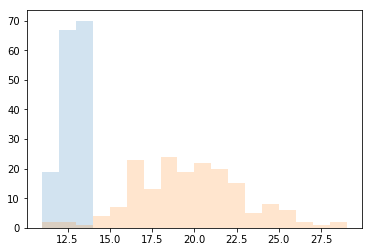

In [3]:
plt.hist(alcohol, label='1', alpha=0.2, bins=range(int(round(min(alcohol))), int(round(max(alcohol)))))
plt.hist(ascalinity, label='1', alpha=0.2, bins=range(int(round(min(ascalinity))), int(round(max(ascalinity)))))

print(str(len(data)) + ' points')


print("Alcohol: " + "mean= " + str(stats.mean(alcohol)) + ', std=' + str(stats.stdev(alcohol)))
print("Ascalinity: " + "mean= " + str(stats.mean(ascalinity)) + ', std=' + str(stats.stdev(ascalinity)))


# 2. Distance Metrics
* Implement the sse function and the general minkowski distance function

In [4]:
# returns the sum-squared-error between two points
def sse(x1, x2):
    val = (x2[0] - x1[0])*(x2[0] - x1[0]) + (x2[1] - x1[1])*(x2[1] - x1[1])
    return val


In [5]:
# returns the minkowski distance between x1 and x2
def minkowski_distance(x1, x2, q):
    sum = 0
    for a, b in zip(x1,x2):
        sum +=abs(a-b)**q
    val=sum**(1/q)
    return val

In [6]:
# returns the L2 distance from x1 to x2
def euclidean_distance(x1, x2):
    return minkowski_distance(x1, x2, 2)

In [7]:
# returns the L1 distance from x1 to x2
def manhattan_distance(x1, x2):
    return minkowski_distance(x1, x2, 1)

In [8]:
t1 = [0,0]
t2 = [3,4]

print("SSE {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, sse(t1, t2), 25.))

print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, euclidean_distance(t1, t2), 5.))
print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, euclidean_distance(t2, t1), 5.))

print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, manhattan_distance(t1, t2), 7.))
print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, manhattan_distance(t2, t1), 7.))

SSE [0, 0] -> [3, 4] = 25.00000, expected=25.00000
Euclidean [0, 0] -> [3, 4] = 5.00000, expected=5.00000
Euclidean [3, 4] -> [0, 0] = 5.00000, expected=5.00000
Manhattan [0, 0] -> [3, 4] = 7.00000, expected=7.00000
Manhattan [3, 4] -> [0, 0] = 7.00000, expected=7.00000


# 3. K-Means
* Implement choose_cluster (find the closest centroid w.r.t. a distance metric)
* Implement k-means
* Respond to a question regarding plotted clusterings

In [9]:
def choose_cluster(centroids, x, distance_metric):
    iterator=0
    clusterIndexValue = -1
    
    leastDistances=[]
    
    for iterator in range(len(centroids)):
        distance =distance_metric(centroids[iterator], x)
        leastDistances.append(distance)
        
    leastDistance = min(float(dis) for dis in leastDistances)

    # fetches the cluser closest for point from the centroid
    clusterIndexValue = leastDistances.index(leastDistance)
    
            
    return clusterIndexValue

In [10]:
val = {}
calMean = {}
finalXValue = {}


def kmeans(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    new_clusters = [-1] * len(data)
    iterations = 0
    total_sse = 0
    
    iterations = 0
    while(1):
        
        iterations = iterations + 1
        prevCentroid = centroids[:]
        
        for count, elem in enumerate(data):
            new_clusters[count] = choose_cluster(centroids, elem, distance_metric)
            

        totaldictX = {}
        totaldictY = {}
        totalCount = {}
        meanValX = {}
        meanValY = {}
        
        for x, cluster in zip(data, new_clusters):
            if cluster in totaldictX:
                totaldictX[cluster] += x[0]
                totaldictY[cluster] += x[1]
                totalCount[cluster] += 1
            else:
                totaldictX[cluster] = x[0]
                totaldictY[cluster] = x[1]
                totalCount[cluster] = 1

        for i in range(len(totaldictX)):
            meanValX[i] = totaldictX[i]/totalCount[i]
            meanValY[i] = totaldictY[i]/totalCount[i]

        val1 = [v for v in meanValX.values()]
        val2 = [v for v in meanValY.values()]

      
        for i in range(len(val1)):
            centroids[i] = (val1[i], val2[i])
        
        if(prevCentroid == centroids):
            break
            
        total_sse = 0     
        for iterator, point in enumerate(data):
            total_sse += sse(point, centroids[new_clusters[iterator]])
            


    return centroids, new_clusters, iterations, total_sse


In [11]:
def cluster_plot(centroids, data, clustering):
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)

In [12]:
initial_centroids = [data[175], data[25], data[67]]

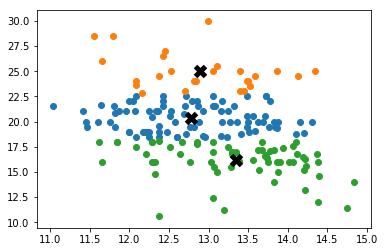

In [13]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, euclidean_distance)
cluster_plot(centroids, data, clustering)

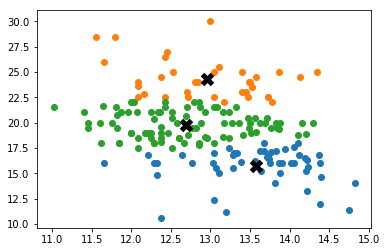

In [14]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, manhattan_distance)
cluster_plot(centroids, data, clustering)

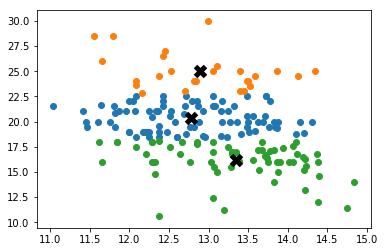

In [15]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, lambda x,y: minkowski_distance(x, y, 3))
cluster_plot(centroids, data, clustering)

## Q: What conclusion can you draw from these plots?
I feel distance measure does not show a significant difference between the clusters chosen in the given plots. However, this might not be same in all the clustering scenarios.

# 4. Choosing K
* Runs several trials of K-Means with different initial points (Forgy), recording SSE
* Plot SSE vs K
* Respond to the question below

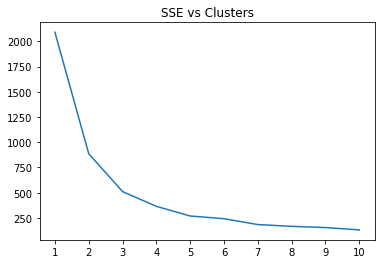

In [16]:
max_clusters = 10
trials = 5

clusters = []
sses = []

random.seed(8675309)

for k in range(1, max_clusters+1):
    sseValue1 = []
    for val in range(1, trials+1):
        initial_centroids = random.sample(data, k)
        sseValue = kmeans(initial_centroids, data, euclidean_distance)[3]
        sseValue1.append(sseValue)
        
    sses.append(stats.mean(sseValue1))
    clusters.append(k)

    
plt.plot(clusters, sses)
plt.xticks(range(1, len(clusters)+1, 1))
plt.title('SSE vs Clusters')

## Q: What is a reasonable value for K based upon this data -- why?
The reasonable value of k would be around 3. This is because we want the SSE to be as lower as possible. But SSE -> 0 if we keep increasing the K. As that means SSE will be zero if k becomes equal to number of points in the data set, which means every point belongs to it's own cluster.  So, we would look for a smallest possible value of K that still has considerably small value of SSE.